In [1]:
!pip install librosa
import librosa
from librosa import display
import os
import pandas as pd
import glob 
import numpy as np

In [3]:
dir_list = os.listdir('C:/Users/Shireen/A FINAL TESS ATTEMPT/data/wavfiles')
dir_list.sort()
dir_list

['.ipynb_checkpoints',
 'OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [31]:
def metadata(basepath):
    dir_list = os.listdir(basepath)
    dir_list.sort()

    TESS= 'C:/Users/Shireen/A FINAL TESS ATTEMPT/data/wavfiles/'
    path = []
    emotion = []
    y=[]
    
    TESS_df = pd.DataFrame(columns=['labels', 'source', 'path'])

    for i in dir_list:
        fname = os.listdir('C:/Users/Shireen/A FINAL TESS ATTEMPT/data/wavfiles/' + i)
        for f in fname:
            if i == 'OAF_angry' or i == 'YAF_angry':
                emotion.append('female_angry')
                y.append(0)
            elif i == 'OAF_disgust' or i == 'YAF_disgust':
                emotion.append('female_disgust')
                y.append(1)
            elif i == 'OAF_Fear' or i == 'YAF_fear':
                emotion.append('female_fear')
                y.append(2)
            elif i == 'OAF_happy' or i == 'YAF_happy':
                emotion.append('female_happy')
                y.append(3)
            elif i == 'OAF_neutral' or i == 'YAF_neutral':
                emotion.append('female_neutral')
                y.append(4)                                
            elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
                emotion.append('female_surprise') 
                y.append(5)              
            elif i == 'OAF_Sad' or i == 'YAF_sad':
                emotion.append('female_sad')
                y.append(6)
            else:
                emotion.append('Unknown')
            path.append(TESS + i + "/" + f)

    TESS_df = pd.DataFrame(emotion, columns = ['labels'])
    TESS_df['source'] = 'TESS'
    TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
    #TESS_df.labels.value_counts()
    return TESS_df

In [57]:
TESS_df = metadata("C:/Users/Shireen/A FINAL TESS ATTEMPT/data/wavfiles")

In [58]:
TESS_df.head(4)

,labels,source,path
0,female_fear,TESS,C:/Users/Shireen/A FINAL TESS ATTEMPT/data/wav...
1,female_fear,TESS,C:/Users/Shireen/A FINAL TESS ATTEMPT/data/wav...
2,female_fear,TESS,C:/Users/Shireen/A FINAL TESS ATTEMPT/data/wav...
3,female_fear,TESS,C:/Users/Shireen/A FINAL TESS ATTEMPT/data/wav...


In [5]:
!pip install opencv-python
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [77]:
for i in dir_list:
    audio_fpath = "C:/Users/Shireen/A FINAL TESS ATTEMPT/data/wavfiles/"+i+"/"
    audio_clips = os.listdir(audio_fpath)
    path = "C:/Users/Shireen/A FINAL TESS ATTEMPT/data/spectograms/"+i+"/"
    if not os.path.isdir(path):
        os.makedirs(path)
    for j in audio_clips:
        x, sr = librosa.load(audio_fpath+j, sr=44100)
        mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path+j+".jpeg")
        plt.close()

In [6]:
categories = os.listdir("C:/Users/Shireen/A FINAL TESS ATTEMPT/data/spectograms/")
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 224 x 224 because the input image resolution for Resnet50 is 224 x 224
            resized_img = img_array.resize((224, 224))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

fpath = "C:/Users/Shireen/A FINAL TESS ATTEMPT/data/spectograms/"
images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  2800 
No. of labels loaded =  2800
<class 'list'> <class 'list'>


In [7]:
label=[]
for i in labels:
    if i==1:
        label.append(0)
    if i==2:
        label.append(1)
    if i==3:
        label.append(2)
    if i==4:
        label.append(3)
    if i==5:
        label.append(4)
    if i==6:
        label.append(5)
    if i==7:
        label.append(6)
        
print(label)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
images = np.array(images)
labels = np.array(label)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (2800, 224, 224, 3) 
Labels shape =  (2800,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
#1-step in data shuffling
random_seed=42
#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 2797 2798 2799]

'n' values after shuffling =  [1088  772 2161 ... 1130 1294  860]


In [10]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (2800, 224, 224, 3) 
Labels shape after shuffling =  (2800,)


In [11]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (2800, 224, 224, 3)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 42)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (2240, 224, 224, 3)
y_train shape =  (2240,)

x_test shape =  (560, 224, 224, 3)
y_test shape =  (560,)


In [16]:
from keras.utils import np_utils
from keras.utils import to_categorical
X_train = x_train/255.
X_test = x_test/255.

# Convert training and test labels to one hot matrices
Y_train = np_utils.to_categorical(y_train, 7)
Y_test = np_utils.to_categorical(y_test, 7)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 2240
number of test examples = 560
X_train shape: (2240, 224, 224, 3)
Y_train shape: (2240, 7)
X_test shape: (560, 224, 224, 3)
Y_test shape: (560, 7)


In [17]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras

In [18]:
img_height,img_width = 224,224 
num_classes = 7
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (224,224,3))

In [19]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.layers import GlobalAveragePooling2D

In [20]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [21]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, epochs = 20, batch_size=128, validation_data=(X_test, Y_test))

Epoch 1/20
18/18 [==============================] - 1934s 107s/step - loss: 0.7678 - accuracy: 0.7330 - val_loss: 2.4799 - val_accuracy: 0.1304
Epoch 2/20
18/18 [==============================] - 1922s 107s/step - loss: 0.0190 - accuracy: 0.9946 - val_loss: 2.5307 - val_accuracy: 0.1304
Epoch 3/20
18/18 [==============================] - 1895s 105s/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 2.7865 - val_accuracy: 0.1304
Epoch 4/20
18/18 [==============================] - 1909s 106s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.2280 - val_accuracy: 0.1304
Epoch 5/20
18/18 [==============================] - 1981s 110s/step - loss: 7.5033e-04 - accuracy: 1.0000 - val_loss: 4.1550 - val_accuracy: 0.1304
Epoch 6/20
18/18 [==============================] - 1948s 108s/step - loss: 6.0671e-04 - accuracy: 1.0000 - val_loss: 5.0821 - val_accuracy: 0.1304
Epoch 7/20
18/18 [==============================] - 1923s 107s/step - loss: 4.2811e-04 - accuracy: 1.0000 - val_loss: 5.7803 - v

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 6.082393169403076
Test accuracy: 0.13035714626312256


In [12]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(Reshape(img_shape))

    return encoder, decoder


IMG_SHAPE = images.shape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE, 32)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 32)                4816928   
_________________________________________________________________
sequential_1 (Sequential)    (None, 224, 224, 3)       4967424   
Total params: 9,784,352
Trainable params: 9,784,352
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history = autoencoder.fit(x=images, y=images, epochs=20,
                validation_data=[images, images])

Epoch 1/20
88/88 [==============================] - 12s 131ms/step - loss: 0.2378 - val_loss: 0.0000e+00
Epoch 2/20
88/88 [==============================] - 12s 137ms/step - loss: 0.0144 - val_loss: 0.0000e+00
Epoch 3/20
88/88 [==============================] - 12s 131ms/step - loss: 0.0144 - val_loss: 0.0000e+00
Epoch 4/20
88/88 [==============================] - 12s 131ms/step - loss: 0.0143 - val_loss: 0.0000e+00
Epoch 5/20
88/88 [==============================] - 11s 130ms/step - loss: 0.0143 - val_loss: 0.0000e+00
Epoch 6/20
88/88 [==============================] - 11s 130ms/step - loss: 0.0143 - val_loss: 0.0000e+00
Epoch 7/20
88/88 [==============================] - 11s 130ms/step - loss: 0.0143 - val_loss: 0.0000e+00
Epoch 8/20
88/88 [==============================] - 11s 130ms/step - loss: 0.0143 - val_loss: 0.0000e+00
Epoch 9/20
88/88 [==============================] - 11s 129ms/step - loss: 0.0142 - val_loss: 0.0000e+00
Epoch 10/20
88/88 [==============================] - 11

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


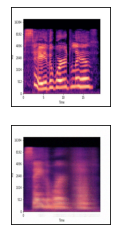

Accuracy= 0.9342783987522125 



In [14]:
decoded_imgs = autoencoder.predict(images)

n = 1
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(images[i].reshape(224, 224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(224, 224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("Accuracy=",1-np.mean(abs(images-decoded_imgs)),'\n')

In [15]:
x_train, x_test, y_train, y_test = train_test_split(decoded_imgs, labels, test_size = 0.2, random_state = 42)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (2240, 224, 224, 3)
y_train shape =  (2240,)

x_test shape =  (560, 224, 224, 3)
y_test shape =  (560,)


In [22]:
model.fit(X_train, Y_train, epochs = 10, batch_size=128, validation_data=(X_test, Y_test))

Epoch 1/10
18/18 [==============================] - 2152s 120s/step - loss: 1.8849 - accuracy: 0.3286 - val_loss: 2.3573 - val_accuracy: 0.1393
Epoch 2/10
18/18 [==============================] - 1916s 106s/step - loss: 1.5306 - accuracy: 0.4313 - val_loss: 2.3642 - val_accuracy: 0.1393
Epoch 3/10
18/18 [==============================] - 2016s 112s/step - loss: 1.3190 - accuracy: 0.5054 - val_loss: 2.4754 - val_accuracy: 0.1393
Epoch 4/10
18/18 [==============================] - 1952s 108s/step - loss: 1.1395 - accuracy: 0.5777 - val_loss: 2.5858 - val_accuracy: 0.1393
Epoch 5/10
18/18 [==============================] - 1957s 109s/step - loss: 1.0064 - accuracy: 0.6205 - val_loss: 3.2661 - val_accuracy: 0.1393
Epoch 6/10
18/18 [==============================] - 1939s 108s/step - loss: 0.9025 - accuracy: 0.6585 - val_loss: 3.7547 - val_accuracy: 0.1393
Epoch 7/10
18/18 [==============================] - 2144s 119s/step - loss: 0.8119 - accuracy: 0.6960 - val_loss: 5.1820 - val_accuracy:

In [23]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 20.281753540039062
Test accuracy: 0.15714286267757416
